In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
data = yf.download(tickers='^NDX', start = '2020-06-01',end = '2025-06-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.columns

MultiIndex([( 'Close', '^NDX'),
            (  'High', '^NDX'),
            (   'Low', '^NDX'),
            (  'Open', '^NDX'),
            ('Volume', '^NDX')],
           names=['Price', 'Ticker'])

In [4]:
data.columns = [f"{col[0]}" for col in data.columns]

In [5]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [6]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

In [7]:
# Copy the 'Close' column and add it as a new column 'Adj Close'
data['Adj Close'] = data[('Close')]
data.head()

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close
Date,,,,,,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000,NaN,NaN,NaN,NaN,9598.889648
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000,100.000000,NaN,NaN,NaN,9657.309570
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000,100.000000,NaN,NaN,NaN,9704.690430
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000,92.026369,NaN,NaN,NaN,9629.660156
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000,93.468196,NaN,NaN,NaN,9824.389648


In [8]:
data.shape

(1257, 10)

In [9]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
       'Adj Close'],
      dtype='object')

In [10]:
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

C:\Users\PC\AppData\Local\Temp\ipykernel_14832\1580431170.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [11]:
data

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000,NaN,NaN,NaN,NaN,9598.889648,54.129883,1,9657.309570
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000,100.000000,NaN,NaN,NaN,9657.309570,14.970703,1,9704.690430
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000,100.000000,NaN,NaN,NaN,9704.690430,-42.509766,0,9629.660156
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000,92.026369,NaN,NaN,NaN,9629.660156,151.299805,1,9824.389648
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000,93.468196,NaN,NaN,NaN,9824.389648,95.829102,1,9901.519531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20170.049768,20124.241863,20915.660156,213.541016,1,21414.990234
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20194.702054,20141.337868,21414.990234,-133.519531,0,21318.169922
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20216.948942,20156.925048,21318.169922,-247.589844,0,21363.949219


In [12]:
data.tail(10)

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2025-05-16,21427.939453,21428.789062,21246.419922,21375.630859,10509820000,68.943002,20178.690319,20063.900652,20051.383965,21427.939453,308.919922,1,21447.050781
2025-05-19,21447.050781,21464.560547,21138.130859,21138.130859,13080030000,69.093266,20299.486554,20091.289764,20069.869618,21447.050781,19.738281,1,21367.369141
2025-05-20,21367.369141,21399.990234,21226.660156,21347.630859,9047100000,67.637871,20401.189657,20116.558662,20087.055042,21367.369141,-136.951172,0,21080.359375
2025-05-21,21080.359375,21482.980469,21002.099609,21217.310547,11112460000,62.573745,20465.872487,20135.643825,20100.211391,21080.359375,15.009766,1,21112.470703
2025-05-22,21112.470703,21263.179688,21046.220703,21097.460938,8289710000,62.905195,20527.453270,20154.986931,20113.618799,21112.470703,109.291016,1,20915.660156
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20170.049768,20124.241863,20915.660156,213.541016,1,21414.990234
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20194.702054,20141.337868,21414.990234,-133.519531,0,21318.169922
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20216.948942,20156.925048,21318.169922,-247.589844,0,21363.949219
2025-05-29,21363.949219,21611.539062,21260.730469,21611.539062,11016850000,63.489276,20771.830176,20239.661819,20172.912123,21363.949219,10.140625,1,21340.990234


In [13]:
data.dropna(inplace=True)


In [14]:
data.reset_index(inplace = True)


In [18]:
# Load sentiment data
sentiment_df = pd.read_csv("../data/cleaned_scores.csv", parse_dates=["date"])

# Rename to match data DataFrame
sentiment_df.rename(columns={'date': 'Date'}, inplace=True)

# Merge on Date
data = pd.merge(data, sentiment_df, how='left', on='Date')

# Fill missing sentiment values (e.g., weekends/holidays)
data[['avg_sentiment', 'avg_score', 'article_count']] = data[['avg_sentiment', 'avg_score', 'article_count']].fillna(method='ffill')


C:\Users\PC\AppData\Local\Temp\ipykernel_14832\100096720.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['avg_sentiment', 'avg_score', 'article_count']] = data[['avg_sentiment', 'avg_score', 'article_count']].fillna(method='ffill')


In [19]:
data.drop(['Close'], axis=1, inplace=True)

In [20]:
data.shape

(1107, 16)

In [21]:
feature_columns = ['High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
                   'avg_sentiment', 'avg_score', 'article_count']

backcandles = 60

In [22]:
# Build X sequences
X = []
for j in range(len(feature_columns)):
    X.append([])
    for i in range(backcandles, len(data)):
        X[j].append(data[feature_columns].iloc[i-backcandles:i, j].values)

X = np.moveaxis(X, [0], [2])  # (samples, backcandles, features)
y = data['TargetClass'].values[backcandles:]



In [23]:
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (1047, 60, 11), y shape: (1047,)


In [24]:
# === 2. Train test split ===

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
# Scale features: flatten 3D to 2D, scale, reshape
scaler = StandardScaler()
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)

X_test_2d = X_test.reshape(-1, X_test.shape[2])
X_test_scaled_2d = scaler.transform(X_test_2d)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)


In [26]:
# === 4. Baseline Models ===
# Flatten data for classical ML models (no sequences)
X_train_flat = X_train_scaled.reshape(X_train.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test.shape[0], -1)


In [27]:
print("\n--- Logistic Regression Baseline ---")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_flat, y_train)
y_pred_lr = lr.predict(X_test_flat)
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

print("\n--- Random Forest Baseline ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)
y_pred_rf = rf.predict(X_test_flat)
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


--- Logistic Regression Baseline ---


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
# === 5. Build LSTM Classification Model ===

inputs = Input(shape=(backcandles, len(feature_columns)))
x = LSTM(100, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = LSTM(50)(x)
x = Dropout(0.3)(x)
x = Dense(25, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# === 6. Train model with validation split ===
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    verbose=2)

Epoch 1/50
24/24 - 2s - 92ms/step - accuracy: 0.4967 - loss: 0.6932 - val_accuracy: 0.5357 - val_loss: 0.6930
Epoch 2/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6928 - val_accuracy: 0.5357 - val_loss: 0.6927
Epoch 3/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6926 - val_accuracy: 0.5357 - val_loss: 0.6924
Epoch 4/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6923 - val_accuracy: 0.5357 - val_loss: 0.6921
Epoch 5/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6921 - val_accuracy: 0.5357 - val_loss: 0.6920
Epoch 6/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6919 - val_accuracy: 0.5357 - val_loss: 0.6918
Epoch 7/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6918 - val_accuracy: 0.5357 - val_loss: 0.6917
Epoch 8/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6916 - val_accuracy: 0.5357 - val_loss: 0.6915
Epoch 9/50
24/24 - 0s - 20ms/step - accuracy: 0.5352 - loss: 0.6915 - val_accuracy: 0.5357 - val_loss: 0.6914
Epoch 10/5

In [30]:
# === 7. Evaluate LSTM ===
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\n--- LSTM Classification Report ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.54      1.00      0.70       113

    accuracy                           0.54       210
   macro avg       0.27      0.50      0.35       210
weighted avg       0.29      0.54      0.38       210

Accuracy: 0.5381


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.46      0.32      0.38        97
           1       0.54      0.68      0.60       113

    accuracy                           0.51       210
   macro avg       0.50      0.50      0.49       210
weighted avg       0.50      0.51      0.50       210

Accuracy: 0.5143 without sentiment

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.54      1.00      0.70       113

    accuracy                           0.54       210
   macro avg       0.27      0.50      0.35       210
weighted avg       0.29      0.54      0.38       210

Accuracy: 0.5381 with sentiment

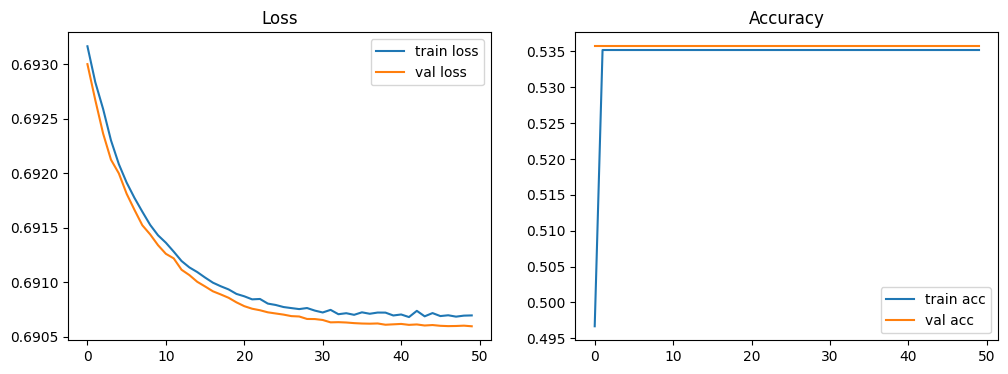

In [31]:
# === 8. Plot training history ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()


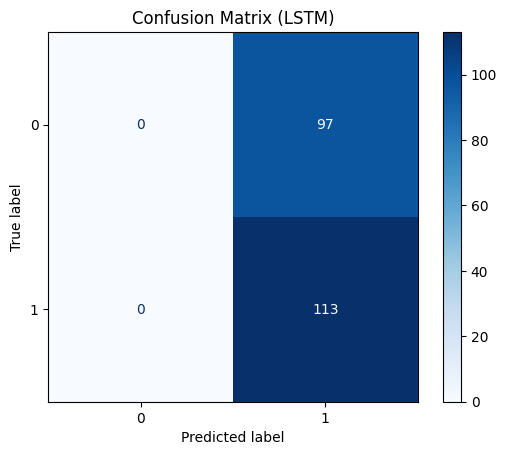

In [32]:
# === 9. Confusion matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (LSTM)")
plt.show()

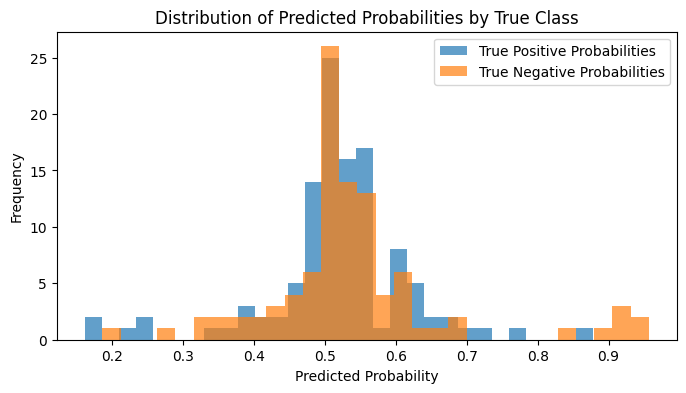

In [29]:
# === 10. Residual-like analysis (probability histogram) ===
plt.figure(figsize=(8,4))
plt.hist(y_pred_prob[y_test==1], bins=30, alpha=0.7, label='True Positive Probabilities')
plt.hist(y_pred_prob[y_test==0], bins=30, alpha=0.7, label='True Negative Probabilities')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Predicted Probabilities by True Class")
plt.show()

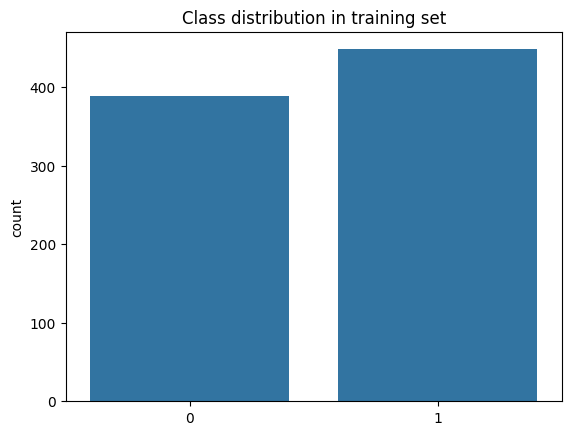

In [30]:
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Class distribution in training set")
plt.show()


Epoch 1/50
13/13 - 4s - 303ms/step - accuracy: 0.5149 - loss: 0.9196 - val_accuracy: 0.7444 - val_loss: 0.7088 - learning_rate: 1.0000e-03
Epoch 2/50
13/13 - 1s - 41ms/step - accuracy: 0.5223 - loss: 0.8360 - val_accuracy: 0.8000 - val_loss: 0.6799 - learning_rate: 1.0000e-03
Epoch 3/50
13/13 - 1s - 41ms/step - accuracy: 0.5335 - loss: 0.8087 - val_accuracy: 0.7778 - val_loss: 0.6915 - learning_rate: 1.0000e-03
Epoch 4/50
13/13 - 1s - 40ms/step - accuracy: 0.5484 - loss: 0.7733 - val_accuracy: 0.7556 - val_loss: 0.6874 - learning_rate: 1.0000e-03
Epoch 5/50
13/13 - 1s - 40ms/step - accuracy: 0.5360 - loss: 0.7847 - val_accuracy: 0.7444 - val_loss: 0.6946 - learning_rate: 1.0000e-03
Epoch 6/50
13/13 - 1s - 40ms/step - accuracy: 0.5385 - loss: 0.7763 - val_accuracy: 0.8000 - val_loss: 0.6773 - learning_rate: 1.0000e-03
Epoch 7/50
13/13 - 1s - 41ms/step - accuracy: 0.5385 - loss: 0.7611 - val_accuracy: 0.8000 - val_loss: 0.6805 - learning_rate: 1.0000e-03
Epoch 8/50
13/13 - 1s - 40ms/step

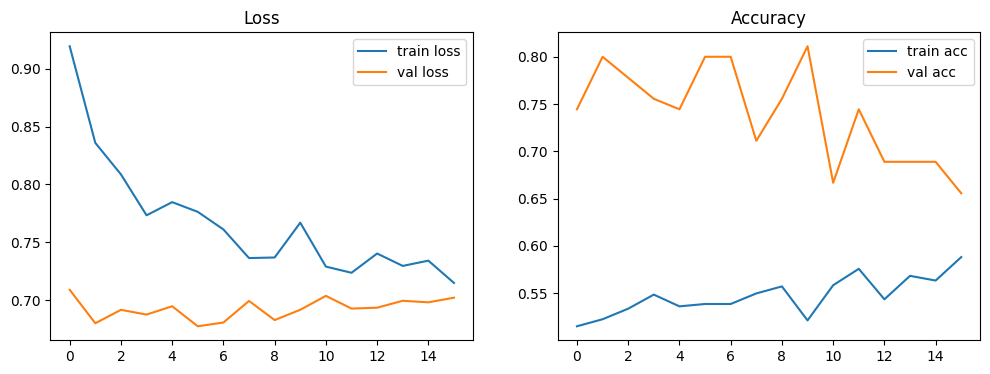

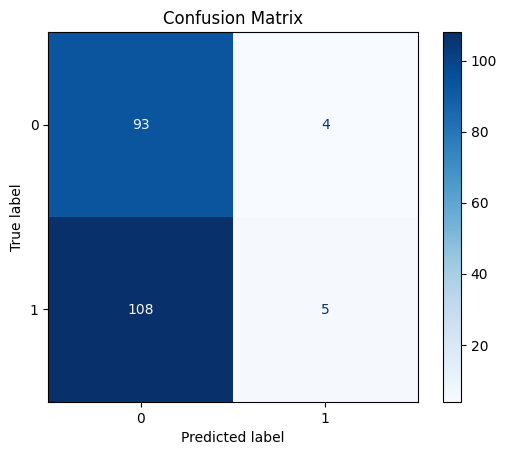

In [32]:
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# === 1. New scaling ===

scaler = RobustScaler()
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)

X_test_2d = X_test.reshape(-1, X_test.shape[2])
X_test_scaled_2d = scaler.transform(X_test_2d)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)

# === 2. SMOTE to oversample minority class in training set ===
X_train_flat = X_train_scaled.reshape(X_train.shape[0], -1)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_flat, y_train)

# Reshape back for LSTM input
X_train_resampled = X_train_resampled.reshape(-1, backcandles, len(feature_columns))

# === 3. LSTM with improvements ===

inputs = Input(shape=(backcandles, len(feature_columns)))
x = Bidirectional(LSTM(100, return_sequences=True))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(50))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# === 4. Callbacks ===

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# === 5. Train ===

history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    shuffle=True,
    verbose=2)

# === 6. Evaluate ===

y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [33]:
from sklearn.metrics import f1_score

y_probs = y_pred_prob  # predicted probabilities for positive class
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold by F1: {best_threshold:.2f}, F1-score: {f1_scores[best_idx]:.3f}")

# Use this threshold to get predictions:
y_pred_opt = (y_probs >= best_threshold).astype(int)

# Show new classification report
print(classification_report(y_test, y_pred_opt))


Best threshold by F1: 0.00, F1-score: 0.700
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.54      1.00      0.70       113

    accuracy                           0.54       210
   macro avg       0.27      0.50      0.35       210
weighted avg       0.29      0.54      0.38       210



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


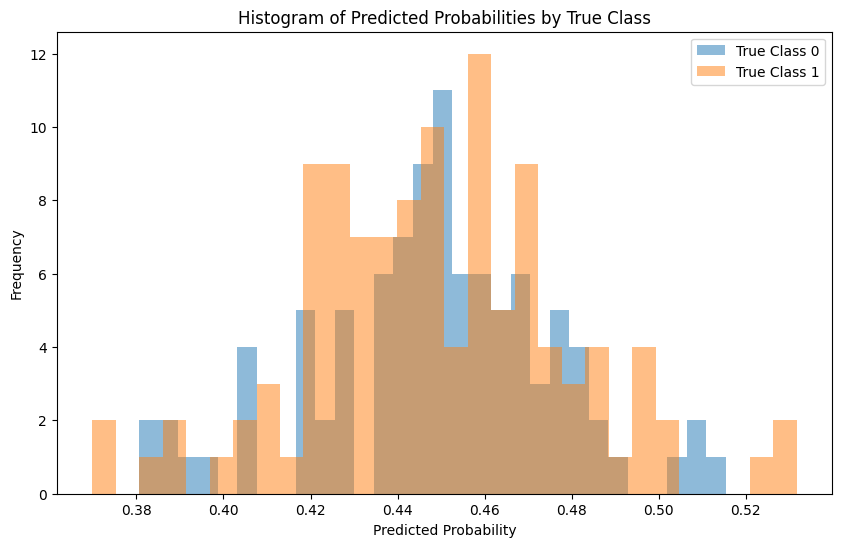

In [36]:
import matplotlib.pyplot as plt

# y_pred_prob = model.predict_proba or model.predict (probabilities for class 1)
# Since you have a sigmoid output, use model.predict to get probabilities.

y_pred_prob = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(10,6))
plt.hist(y_pred_prob[y_test.flatten() == 0], bins=30, alpha=0.5, label='True Class 0')
plt.hist(y_pred_prob[y_test.flatten() == 1], bins=30, alpha=0.5, label='True Class 1')
plt.title('Histogram of Predicted Probabilities by True Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


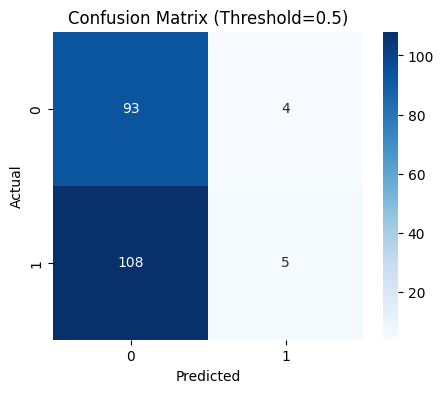

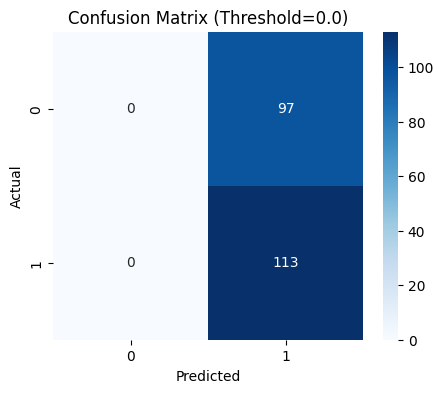

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Threshold 0.5
y_pred_05 = (y_pred_prob >= 0.5).astype(int)
plot_cm(y_test, y_pred_05, "Confusion Matrix (Threshold=0.5)")

# Threshold 0.0 (predict all positive)
y_pred_0 = (y_pred_prob >= 0.0).astype(int)
plot_cm(y_test, y_pred_0, "Confusion Matrix (Threshold=0.0)")


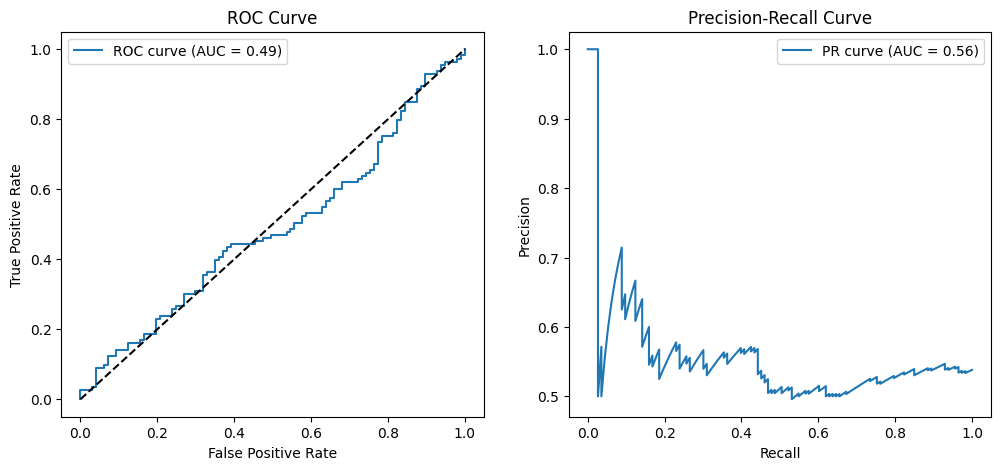

In [38]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()


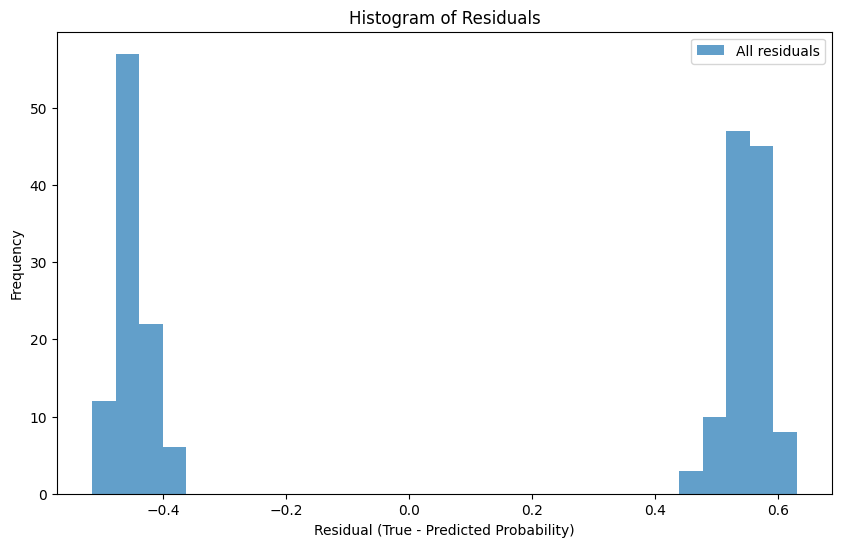

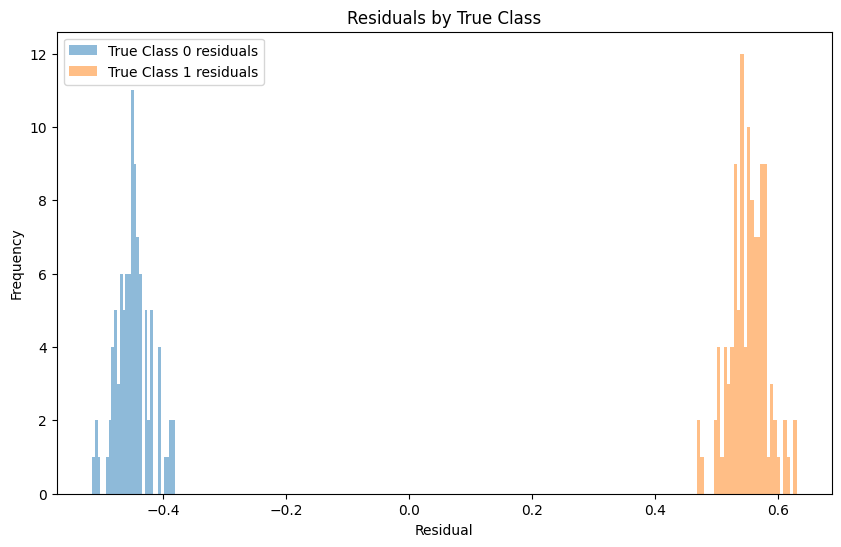

In [39]:
residuals = y_test.flatten() - y_pred_prob

plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, alpha=0.7, label='All residuals')
plt.title('Histogram of Residuals')
plt.xlabel('Residual (True - Predicted Probability)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.hist(residuals[y_test.flatten()==0], bins=30, alpha=0.5, label='True Class 0 residuals')
plt.hist(residuals[y_test.flatten()==1], bins=30, alpha=0.5, label='True Class 1 residuals')
plt.title('Residuals by True Class')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [41]:
import numpy as np

threshold = 0.5
y_pred_label = (y_pred_prob >= threshold).astype(int)

misclassified_idx = np.where(y_pred_label != y_test.flatten())[0]
print(f"Total misclassified samples: {len(misclassified_idx)}")

print("\nExamples of misclassified samples:")
for idx in misclassified_idx[:5]:
    print(f"Index: {idx}, True Label: {y_test[idx]}, Predicted Prob: {y_pred_prob[idx]:.3f}")
    # Optionally print feature info:
    # print(data.iloc[idx + backcandles][feature_columns])


Total misclassified samples: 112

Examples of misclassified samples:
Index: 0, True Label: 1, Predicted Prob: 0.454
Index: 1, True Label: 1, Predicted Prob: 0.459
Index: 2, True Label: 1, Predicted Prob: 0.444
Index: 4, True Label: 1, Predicted Prob: 0.476
Index: 5, True Label: 1, Predicted Prob: 0.423


In [42]:
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 101)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold by F1 score: {best_thresh:.2f} with F1: {max(f1_scores):.3f}")


Best Threshold by F1 score: 0.00 with F1: 0.700


In [ ]:
# Compute class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.flatten())
class_weight_dict = dict(enumerate(class_weights))

# In model.fit(), add:
model.fit(X_train_scaled, y_train, epochs=30, batch_size=15, class_weight=class_weight_dict, validation_split=0.1)


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5221 - loss: 0.8005 - val_accuracy: 0.4881 - val_loss: 0.7532
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5817 - loss: 0.7333 - val_accuracy: 0.4762 - val_loss: 0.7604
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5908 - loss: 0.7240 - val_accuracy: 0.4048 - val_loss: 0.7729
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5122 - loss: 0.7754 - val_accuracy: 0.4167 - val_loss: 0.7794
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5374 - loss: 0.7508 - val_accuracy: 0.4286 - val_loss: 0.8009
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5444 - loss: 0.7537 - val_accuracy: 0.4762 - val_loss: 0.8020
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4695 - loss: 0.7841 - val_accuracy: 0.4405 - val_loss: 0.8060
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5446 - loss: 0.7247 - val_accuracy: 0.4286 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


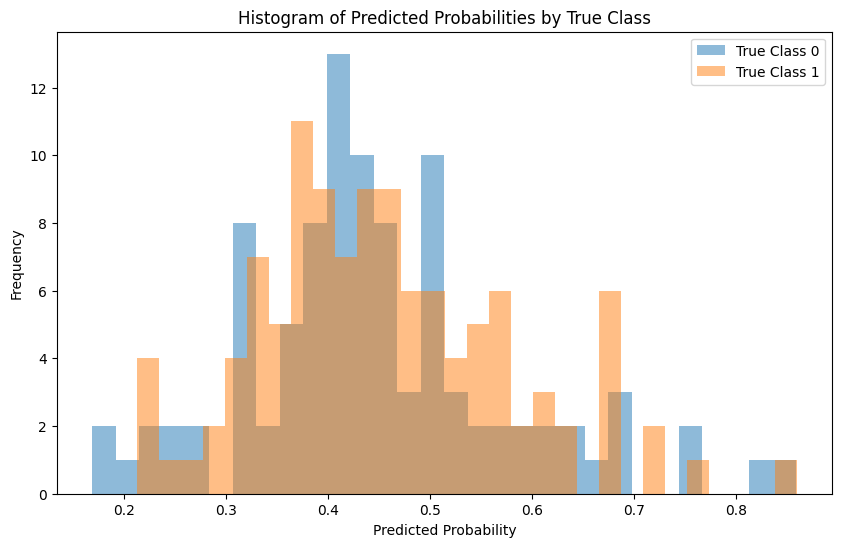

In [44]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Plot predicted probabilities
plt.figure(figsize=(10,6))
plt.hist(y_pred_prob[y_test == 0], bins=30, alpha=0.5, label='True Class 0')
plt.hist(y_pred_prob[y_test == 1], bins=30, alpha=0.5, label='True Class 1')
plt.title('Histogram of Predicted Probabilities by True Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()